In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import weak_sauce as ws
import weak_sauce.data_tools
from weak_sauce.grid import MoveableGrid
import weak_sauce.shifted_cmap
from weak_sauce.sources import Source

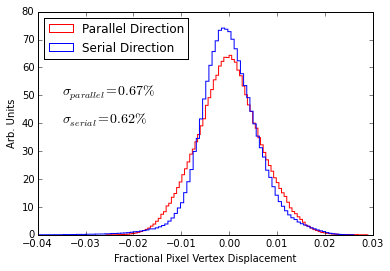

In [24]:
data_mg = MoveableGrid('/nfs/slac/g/ki/ki19/lsst/mbaumer/ccd_mg_model_fits/lsst_amp03_maxit100000_step0.1_decay0.0/best_mg.pkl') 
small_img = np.load('../data/lsst_ultraflat_75ke_amp3.npy')[100:-100,100:-100]
ideal_source = Source(num_x=small_img.shape[1]+1,num_y=small_img.shape[0]+1) 

vert = (data_mg.source.vertices[:,:,0]-ideal_source.vertices[:,:,0])[1:-1,1:-1]
horiz= (data_mg.source.vertices[:,:,1]-ideal_source.vertices[:,:,1])[1:-1,1:-1]

plt.hist(
        horiz.flatten(), #names are flipped by transpose
        bins=100,histtype='step',color='red',label='Parallel Direction',normed=1);
plt.hist(
        vert.flatten(),
        bins=100,histtype='step',color='blue',label='Serial Direction',normed=1);
#plt.hist(ndimage.gaussian_filter(
#        (data_mg.source.vertices[:,:,0]-np.roll(data_mg.source.vertices[:,:,0],1,axis=0))[1:-1,1:-1],
#        sigma=(2,2), order=0).flatten(),bins=100,histtype='step',ls='dashed',color='blue',label='Vertical Smoothed',normed=1);
#plt.hist(ndimage.gaussian_filter(
#        (data_mg.source.vertices[:,:,1]-np.roll(data_mg.source.vertices[:,:,1],1,axis=1))[1:-1,1:-1],
#        sigma=(2,2), order=0).flatten(),bins=100,histtype='step',ls='dashed',color='red',label='Horizontal Smoothed',normed=1);
plt.xlabel('Fractional Pixel Vertex Displacement')
plt.ylabel('Arb. Units')
plt.text(-0.035,50,r'$\sigma_{{parallel}}= {val}\%$'.format(val=np.round(np.std(horiz)*100,2)),size=14)
plt.text(-0.035,40,r'$\sigma_{{serial}} = {val}\%$'.format(val=np.round(np.std(vert)*100,2)),size=14)
plt.legend(loc=2)